In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

imputer = SimpleImputer(strategy='most_frequent')
df[['Age', 'Embarked']] = imputer.fit_transform(df[['Age', 'Embarked']])
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

AUC: 0.8831402831402833

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

AUC: 0.8958815958815959

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    acc

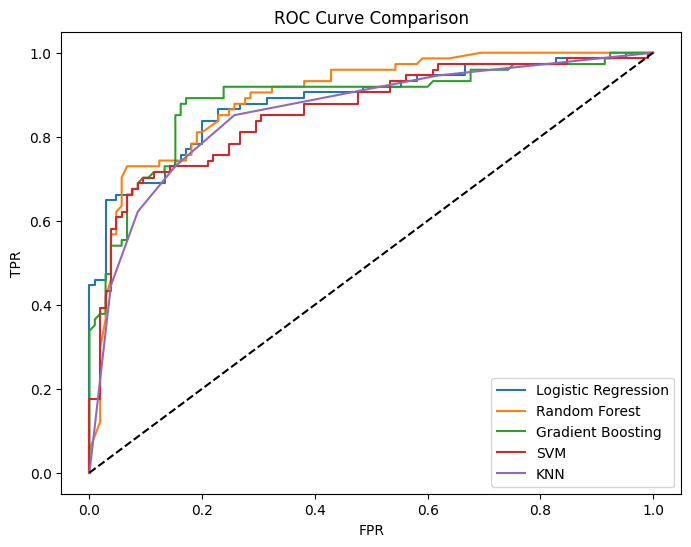

In [9]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=label)

plt.figure(figsize=(8,6))
for name, model in models.items():
    plot_roc_curve(model, X_test_scaled, y_test, name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.5379 - loss: 0.6947 - val_accuracy: 0.7318 - val_loss: 0.6087
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7305 - loss: 0.6018 - val_accuracy: 0.7430 - val_loss: 0.5215
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7780 - loss: 0.5271 - val_accuracy: 0.7877 - val_loss: 0.4700
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8124 - loss: 0.4608 - val_accuracy: 0.7709 - val_loss: 0.4472
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8235 - loss: 0.4381 - val_accuracy: 0.7933 - val_loss: 0.4347
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7845 - loss: 0.4682 - val_accuracy: 0.7989 - val_loss: 0.4287
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8071 - loss: 0.4334 - val_accuracy: 0.7933 - val_loss: 0.4218
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8181 - loss: 0.4547 - val_accuracy: 0.7933 - v

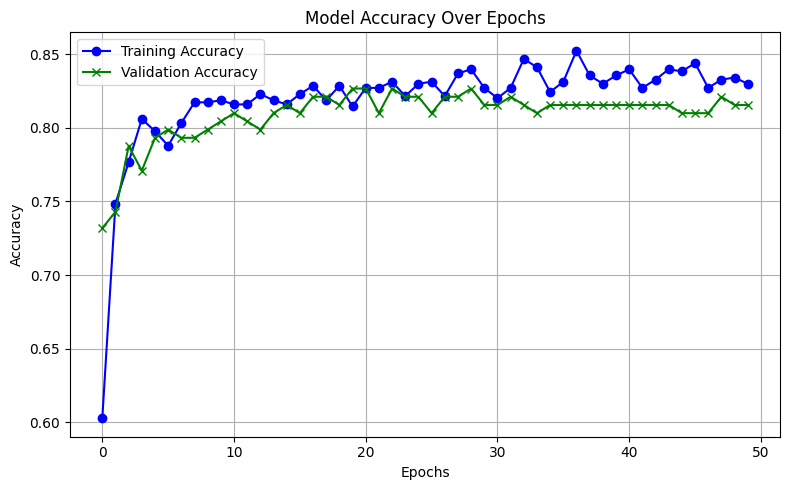

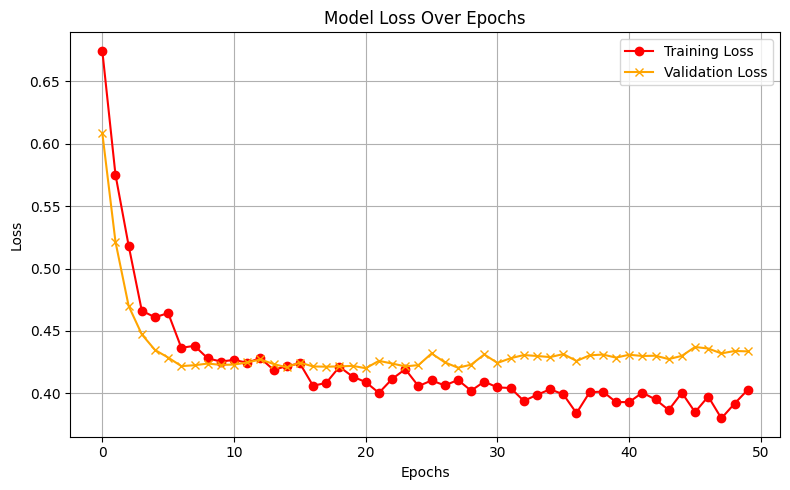

In [12]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green', marker='x')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='red', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='x')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


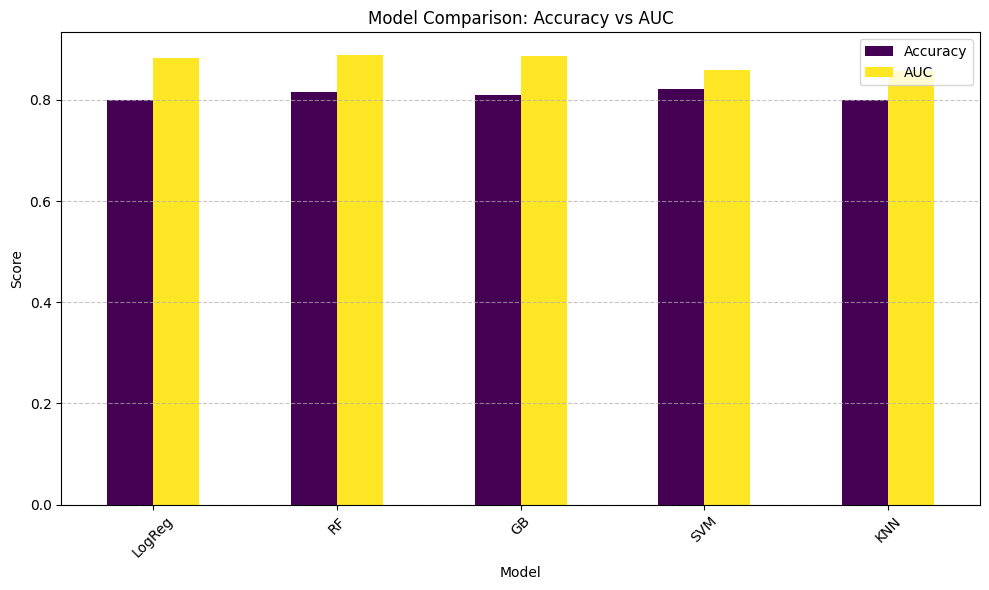

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Define models
ml_models = {
    'LogReg': LogisticRegression(),
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

# Initialize result storage
results = {
    'Model': [],
    'Accuracy': [],
    'AUC': []
}

# Loop over models
for name, clf in ml_models.items():
    clf.fit(X_train_scaled, y_train)
    acc = clf.score(X_test_scaled, y_test)
    auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])

    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['AUC'].append(auc)

# Create a DataFrame
results_df = pd.DataFrame(results)

# Plot
ax = results_df.set_index('Model').plot(kind='bar', figsize=(10, 6), title="Model Comparison: Accuracy vs AUC", colormap='viridis')
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
